In [10]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

Once again, we make use of the Pokémon data for this exercise.

In [11]:
pokemon = pd.read_csv('pokemon.csv')
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


**Task 1**: Try plotting the distribution of Pokémon heights (given in meters). For this exercise, experiment with different axis limits as well as bin widths to see what gives the clearest view of the data.

(array([ 11., 209., 344., 181.,  44.,  11.,   3.,   1.,   1.,   2.]),
 array([  1. ,  26.4,  51.8,  77.2, 102.6, 128. , 153.4, 178.8, 204.2,
        229.6, 255. ]),
 <a list of 10 Patch objects>)

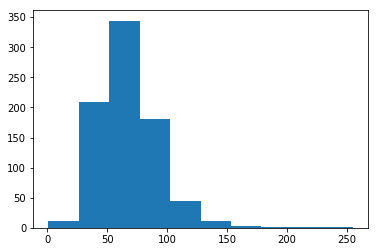

In [15]:
fig = plt.figure()
ax = fig.add_axes([.125, .125, .775, .755]) 
ax.hist(data = pokemon, x = 'hp') 



**Task 2**: In this task, you should plot the distribution of Pokémon weights (given in kilograms). Due to the very large range of values taken, you will probably want to perform an _axis transformation_ as part of your visualization workflow.

In [13]:
np.log10(pokemon.weight.describe())

count    2.906874
mean     1.790786
std      2.047350
min     -1.000000
25%      0.954243
50%      1.431364
75%      1.799341
max      2.999957
Name: weight, dtype: float64

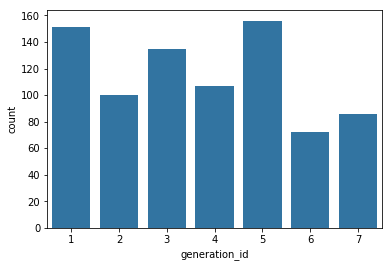

In [16]:
fig = plt.figure()
ax = fig.add_axes([.125, .125, .775, .755])
base_color = sb.color_palette()[0]
sb.countplot(data = pokemon, x = 'generation_id', color = base_color, ax = ax) 


(array([  2.,   5.,   8.,  55., 105., 113., 122., 111.,  85.,  68.,  47.,
         26.,  19.,  18.,   8.,   6.,   2.,   0.,   3.,   0.,   2.,   1.,
          1.]),
 array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
        130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230], dtype=int64),
 <a list of 23 Patch objects>)

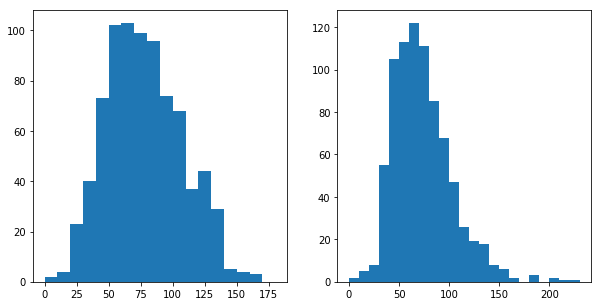

In [18]:
plt.figure(figsize = [10, 5])
plt.subplot(1, 2, 1) 
bin_edges = np.arange(0, pokemon['attack'].max()+1, 10) 
plt.hist(data = pokemon, x = 'attack', bins = bin_edges)

plt.subplot(1, 2, 2)
bin_edges = np.arange(0, pokemon['defense'].max()+1, 10)
plt.hist(data = pokemon, x = 'defense', bins = bin_edges) 


In [22]:
pokemon.height.describe()

count    807.000000
mean       1.162454
std        1.081030
min        0.100000
25%        0.600000
50%        1.000000
75%        1.500000
max       14.500000
Name: height, dtype: float64

(0, 35)

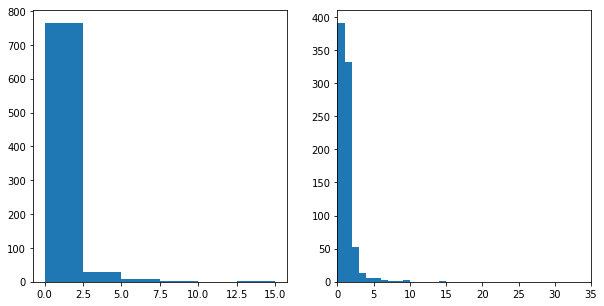

In [20]:
plt.figure(figsize = [10, 5]) 

# histogram on left: full data 
plt.subplot(1, 2, 1) 
bin_edges = np.arange(0, pokemon['height'].max()+2.5, 2.5) 
plt.hist(data = pokemon, x = 'height', bins = bin_edges) 

# histogram on right: focus in on bulk of data < 35 
plt.subplot(1, 2, 2) 
bin_edges = np.arange(0, 35+1, 1) 
plt.hist(data = pokemon, x = 'height', bins = bin_edges) 
plt.xlim(0, 35)


In [26]:
pokemon[pokemon['height']> 14]

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
320,321,wailord,3,14.5,398.0,175,water,NaN,170,90,45,60,90,45


Text(0.5, 0, 'values')

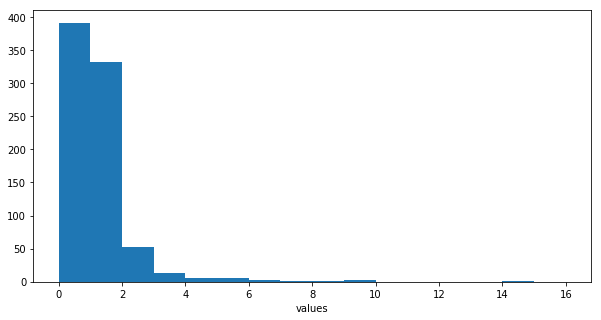

In [39]:
plt.figure(figsize = [10, 5]) 

# histogram on left: full data 
#plt.subplot(1, 2, 1) 
bin_edges = np.arange(0, pokemon['height'].max()+2.5, 1) 
plt.hist(data = pokemon, x = 'height', bins = bin_edges) 
plt.xlabel('values')

Text(0.5, 0, 'log(values)')

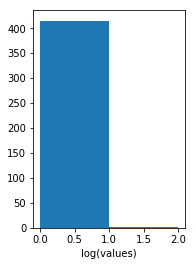

In [47]:
# right histogram: data plotted after direct log transformation 
plt.subplot(1, 2, 2) 
log_data = np.log10(pokemon['height']) # direct data transform 
log_bin_edges = np.arange(0, log_data.max()+1, 1) 
plt.hist(log_data, bins = log_bin_edges) 
plt.xlabel('log(values)') 


Text(0.5, 0, 'log(values)')

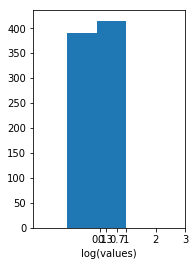

In [62]:
# right histogram: data plotted after direct log transformation 
plt.subplot(1, 2, 2) 
log_data = np.log10(pokemon['height']) # direct data transform 
log_bin_edges = np.arange(-2, log_data.max(), 1) 
plt.hist(log_data, bins = log_bin_edges) 
tick_locs = [.1,.3,.7,1,2,3]
plt.xticks(tick_locs, tick_locs)
plt.xlabel('log(values)') 

In [63]:
pokemon.describe()

,id,generation_id,height,weight,base_experience,hp,attack,defense,speed,special-attack,special-defense
count,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000
mean,404.000000,3.714994,1.162454,61.771128,144.848823,68.748451,76.086741,71.726146,65.830235,69.486989,70.013631
std,233.105126,1.944148,1.081030,111.519355,74.953116,26.032808,29.544598,29.730228,27.736838,29.439715,27.292344
min,1.000000,1.000000,0.100000,0.100000,36.000000,1.000000,5.000000,5.000000,5.000000,10.000000,20.000000
25%,202.500000,2.000000,0.600000,9.000000,66.000000,50.000000,55.000000,50.000000,45.000000,45.000000,50.000000
50%,404.000000,4.000000,1.000000,27.000000,151.000000,65.000000,75.000000,67.000000,65.000000,65.000000,65.000000
75%,605.500000,5.000000,1.500000,63.000000,179.500000,80.000000,95.000000,89.000000,85.000000,90.000000,85.000000
max,807.000000,7.000000,14.500000,999.900000,608.000000,255.000000,181.000000,230.000000,160.000000,173.000000,230.000000


([<matplotlib.axis.XTick at 0x186180591d0>,
 <a list of 7 Text xticklabel objects>)

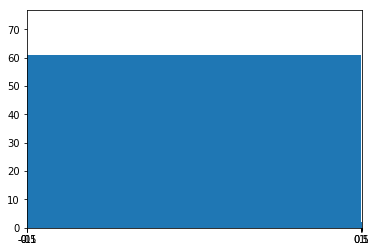

In [83]:
#bin_edges = 10 ** np.arange(0.8, np.log10(pokemon['base_experience'].max())+0.1, 0.1) 
bin_edges =100
plt.hist(log_data, bins = bin_edges) 
plt.xscale('log') 
tick_locs = [-1, -.5, -.1, 0, .1, .5, 1] 
plt.xticks(tick_locs, tick_locs) 


In [81]:
log_data

0     -0.154902
1      0.000000
2      0.301030
3     -0.221849
4      0.041393
5      0.230449
6     -0.301030
7      0.000000
8      0.204120
9     -0.522879
10    -0.154902
11     0.041393
12    -0.522879
13    -0.221849
14     0.000000
15    -0.522879
16     0.041393
17     0.176091
18    -0.522879
19    -0.154902
20    -0.522879
21     0.079181
22     0.301030
23     0.544068
24    -0.397940
25    -0.096910
26    -0.221849
27     0.000000
28    -0.397940
29    -0.096910
         ...   
777   -0.698970
778   -0.045757
779    0.477121
780    0.591065
781   -0.221849
782    0.079181
783    0.204120
784    0.255273
785    0.079181
786    0.278754
787    0.113943
788   -0.698970
789   -1.000000
790    0.531479
791    0.602060
792    0.079181
793    0.380211
794    0.255273
795    0.579784
796    0.963788
797   -0.522879
798    0.740363
799    0.380211
800    0.000000
801   -0.154902
802   -0.221849
803    0.556303
804    0.740363
805    0.255273
806    0.176091
Name: height, Length: 80